In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [260]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [243]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

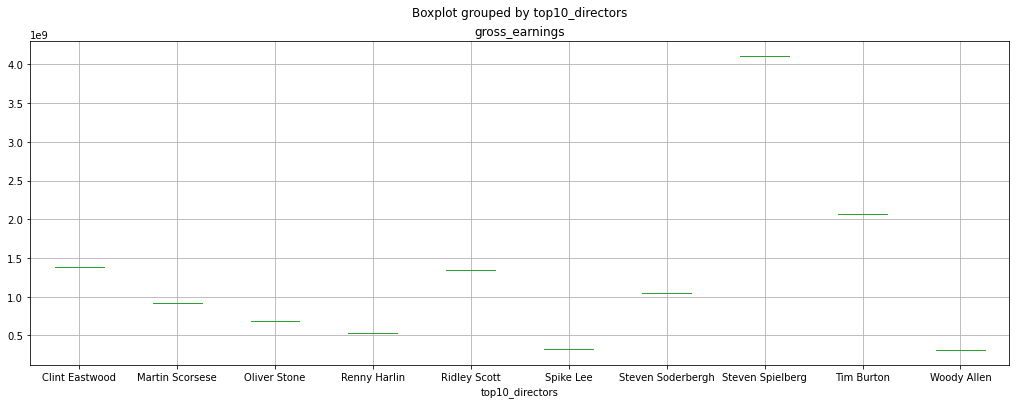

In [261]:
#get top 10 directors
top10_directors = list(data['director_name'].value_counts().index[1:11])

#get the top 10 directors' movies and their data(gross)
gross_director = data[data["director_name"].isin(top10_directors)]
#get the gross earnings of the directors for all their movies
gross_earnings = gross_director.groupby("director_name")['gross'].sum()

gross_directors_list = list(gross_earnings.index)
gross_earnings_list = list(gross_earnings)

#create a new data frames for top 10 directors with most movies and their gross earnings 
boxplot_dataframe = pd.DataFrame(gross_earnings_list, columns=['gross_earnings'])
boxplot_dataframe['top10_directors'] = gross_directors_list

boxplot = boxplot_dataframe.boxplot(by = 'top10_directors',column='gross_earnings', figsize=(17,6))  
plt.show()


## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

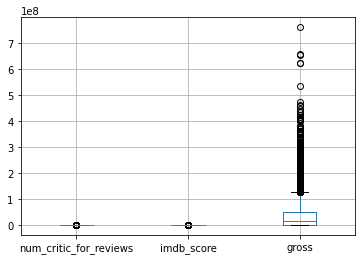

In [263]:
columns = ['num_critic_for_reviews', 'imdb_score', 'gross']
data_boxplot = data.boxplot(columns)

## Compute Sales (Gross - Budget), add it as another column

In [269]:
sales = np.subtract(data['gross'],data['budget'])
data['sales'] = sales
data['sales']

0       523505847.0
1         9404152.0
2       -44925825.0
3       198130642.0
4               0.0
           ...     
5039            0.0
5040        -1400.0
5041        10443.0
5042        84122.0
5043            0.0
Name: sales, Length: 5044, dtype: float64

## Which directors garnered the most total sales?

In [265]:
directors_with_total_sales = data.groupby("director_name")['sales'].sum()
directors_with_total_sales.sort_values(ascending = False)[:10]

director_name
Steven Spielberg     2.451332e+09
George Lucas         1.386641e+09
James Cameron        1.199626e+09
Joss Whedon          1.000887e+09
Chris Columbus       9.417076e+08
Peter Jackson        9.009693e+08
Tim Burton           8.242755e+08
Christopher Nolan    8.082276e+08
Jon Favreau          7.693815e+08
Francis Lawrence     7.555020e+08
Name: sales, dtype: float64

## Plot sales and average likes as a scatterplot. Fit it with a line.

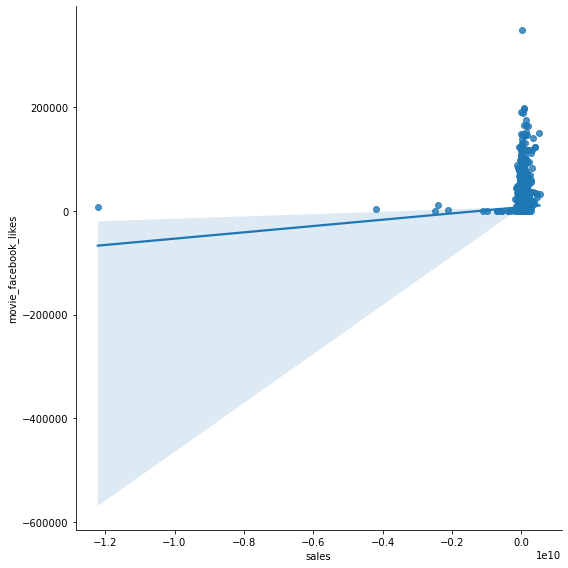

In [266]:
sns.lmplot(x="sales", 
           y="movie_facebook_likes",
           data=data, height=8)
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

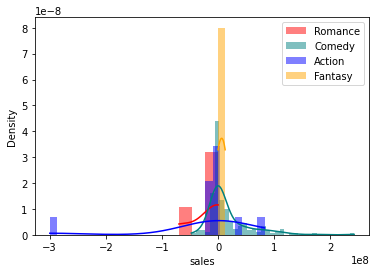

In [249]:
ax = sns.histplot(data[data['genres'] == 'Romance']["sales"], color="red", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(data[data['genres'] == 'Comedy']["sales"], color="teal", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Action']["sales"], color="blue", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Fantasy']["sales"], color="orange", label="Fantasy", kde=True, stat="density", linewidth=0, ax=ax)

ax.legend()
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [250]:
columns = ['actor_3_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes']
average_actors_likes = data[columns].mean(axis=1)
data['average_actors_likes'] = average_actors_likes

list(data['average_actors_likes'])

[930.3333333333334,
 15333.333333333334,
 3851.3333333333335,
 24333.333333333332,
 47.666666666666664,
 600.6666666666666,
 13000.0,
 545.3333333333334,
 22000.0,
 15333.333333333334,
 7000.0,
 9634.333333333334,
 418.6666666666667,
 15333.333333333334,
 14333.333333333334,
 6249.333333333333,
 7472.333333333333,
 22000.0,
 17333.333333333332,
 3844.6666666666665,
 2248.3333333333335,
 8654.333333333334,
 837.0,
 2248.3333333333335,
 7666.666666666667,
 2334.3333333333335,
 14598.0,
 17000.0,
 8209.0,
 2000.0,
 613.0,
 13000.0,
 9333.333333333334,
 25333.333333333332,
 7122.666666666667,
 4513.0,
 646.3333333333334,
 912.6666666666666,
 23333.333333333332,
 8608.333333333334,
 7666.666666666667,
 898.3333333333334,
 5564.666666666667,
 5573.666666666667,
 8996.0,
 21000.0,
 9666.666666666666,
 25333.333333333332,
 6969.666666666667,
 558.6666666666666,
 9862.0,
 5267.666666666667,
 5962.333333333333,
 768.0,
 4333.333333333333,
 179.33333333333334,
 1279.3333333333333,
 407.3333333333

## Copying the whole dataframe

In [220]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,avg_movie_fb_likes,average_actors_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,7524.472443,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,7524.472443,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,7524.472443,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,7524.472443,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,7524.472443,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

- num_critic_for_review

In [239]:
max = df['num_critic_for_reviews'].max()
min = df['num_critic_for_reviews'].min()
df['nm_num_critic_for_reviews'] = (df['num_critic_for_reviews'] - min) / (max-min)
df['nm_num_critic_for_reviews']

0       0.889299
1       0.371464
2       0.740467
3       1.000000
4       0.000000
          ...   
5039    0.052891
5040    0.015990
5041    0.017220
5042    0.052891
5043    0.000000
Name: nm_num_critic_for_reviews, Length: 5044, dtype: float64

- duration

In [237]:
max = df['duration'].max()
min = df['duration'].min()
df['nm_duration'] = (df['duration'] - min) / (max-min)
df['nm_duration']

0       0.941799
1       0.894180
2       0.783069
3       0.867725
4       0.000000
          ...   
5039    0.227513
5040    0.402116
5041    0.529101
5042    0.476190
5043    0.000000
Name: nm_duration, Length: 5044, dtype: float64

- director_facebook_likes

In [236]:
max = df['director_facebook_likes'].max()
min = df['director_facebook_likes'].min()
df['nm_director_facebook_likes'] = (df['director_facebook_likes'] - min) / (max-min)
df['nm_director_facebook_likes']

0       0.000000
1       0.024478
2       0.000000
3       0.956522
4       0.005696
          ...   
5039    0.000000
5040    0.000000
5041    0.000000
5042    0.000696
5043    0.000000
Name: nm_director_facebook_likes, Length: 5044, dtype: float64

- actor_3_facebook_likes

In [235]:
max = df['actor_3_facebook_likes'].max()
min = df['actor_3_facebook_likes'].min()
df['nm_actor_3_facebook_likes'] = (df['actor_3_facebook_likes'] - min) / (max-min)
df['nm_actor_3_facebook_likes']

0       0.037174
1       0.043478
2       0.007000
3       1.000000
4       0.000000
          ...   
5039    0.013870
5040    0.000000
5041    0.021261
5042    0.000696
5043    0.000000
Name: nm_actor_3_facebook_likes, Length: 5044, dtype: float64

- actor_1_facebook_likes

In [234]:
max = df['actor_1_facebook_likes'].max()
min = df['actor_1_facebook_likes'].min()
df['nm_actor_1_facebook_likes'] = (df['actor_1_facebook_likes'] - min) / (max-min)
df['nm_actor_1_facebook_likes']

0       0.001563
1       0.062500
2       0.017188
3       0.042188
4       0.000205
          ...   
5039    0.001314
5040    0.000000
5041    0.001478
5042    0.000134
5043    0.000000
Name: nm_actor_1_facebook_likes, Length: 5044, dtype: float64

- gross

In [233]:
max = df['gross'].max()
min = df['gross'].min()
df['nm_gross'] = (df['gross'] - min) / (max-min)
df['nm_gross']

0       1.000000
1       0.406840
2       0.263080
3       0.589253
4       0.000000
          ...   
5039    0.000000
5040    0.000000
5041    0.000014
5042    0.000112
5043    0.000000
Name: nm_gross, Length: 5044, dtype: float64

- num_voted_users

In [232]:
max = df['num_voted_users'].max()
min = df['num_voted_users'].min()
df['nm_num_voted_users'] = (df['num_voted_users'] - min) / (max-min)
df['nm_num_voted_users']

0       0.524454
1       0.278867
2       0.163258
3       0.677217
4       0.000005
          ...   
5039    0.043698
5040    0.000022
5041    0.000743
5042    0.002536
5043    0.000000
Name: nm_num_voted_users, Length: 5044, dtype: float64

- cast_total_facebook_likes

In [231]:
max = df['cast_total_facebook_likes'].max()
min = df['cast_total_facebook_likes'].min()
df['nm_cast_total_facebook_likes'] = (df['cast_total_facebook_likes'] - min) / (max-min)
df['nm_cast_total_facebook_likes']

0       0.007361
1       0.073622
2       0.017816
3       0.162561
4       0.000218
          ...   
5039    0.002669
5040    0.000000
5041    0.003633
5042    0.000248
5043    0.000000
Name: nm_cast_total_facebook_likes, Length: 5044, dtype: float64

- facenumber_in_poster

In [230]:
max = df['facenumber_in_poster'].max()
min = df['facenumber_in_poster'].min()
df['nm_facenumber_in_poster'] = (df['facenumber_in_poster'] - min) / (max-min)
df['nm_facenumber_in_poster']

0       0.000000
1       0.000000
2       0.023256
3       0.000000
4       0.000000
          ...   
5039    0.023256
5040    0.000000
5041    0.116279
5042    0.000000
5043    0.000000
Name: nm_facenumber_in_poster, Length: 5044, dtype: float64

- num_user_for_reviews

In [229]:
max = df['num_user_for_reviews'].max()
min = df['num_user_for_reviews'].min()
df['nm_num_user_for_reviews'] = (df['num_user_for_reviews'] - min) / (max-min)
df['nm_num_user_for_reviews']

0       0.603557
1       0.244664
2       0.196443
3       0.533794
4       0.000000
          ...   
5039    0.070949
5040    0.000593
5041    0.001779
5042    0.016601
5043    0.000000
Name: nm_num_user_for_reviews, Length: 5044, dtype: float64

- budget

In [228]:
max = df['budget'].max()
min = df['budget'].min()
df['nm_budget'] = (df['budget'] - min) / (max-min)
df['nm_budget']

0       1.940158e-02
1       2.455896e-02
2       2.005649e-02
3       2.046580e-02
4       0.000000e+00
            ...     
5039    0.000000e+00
5040    1.146085e-07
5041    0.000000e+00
5042    9.004953e-08
5043    0.000000e+00
Name: nm_budget, Length: 5044, dtype: float64

- title_year

In [227]:
max = df['title_year'].max()
min = df['title_year'].min()
df['nm_title_year'] = (df['title_year'] - min) / (max-min)
df['nm_title_year']

0       0.996528
1       0.995536
2       0.999504
3       0.998016
4       0.000000
          ...   
5039    0.000000
5040    0.998512
5041    0.998016
5042    0.994048
5043    0.999008
Name: nm_title_year, Length: 5044, dtype: float64

- actor_2_facebook_likes

In [226]:
max = df['actor_2_facebook_likes'].max()
min = df['actor_2_facebook_likes'].min()
df['nm_actor_2_facebook_likes'] = (df['actor_2_facebook_likes'] - min) / (max-min)
df['nm_actor_2_facebook_likes']

0       0.006832
1       0.036496
2       0.002869
3       0.167883
4       0.000088
          ...   
5039    0.004328
5040    0.000000
5041    0.005248
5042    0.000168
5043    0.000000
Name: nm_actor_2_facebook_likes, Length: 5044, dtype: float64

- imdb_score

In [225]:
max = df['imdb_score'].max()
min = df['imdb_score'].min()
df['nm_imdb_score'] = (df['imdb_score'] - min) / (max-min)
df['nm_imdb_score']

0       0.831579
1       0.747368
2       0.715789
3       0.894737
4       0.747368
          ...   
5039    0.789474
5040    0.663158
5041    0.663158
5042    0.694737
5043    0.000000
Name: nm_imdb_score, Length: 5044, dtype: float64

- aspect_ratio

In [224]:
max = df['aspect_ratio'].max()
min = df['aspect_ratio'].min()
df['nm_aspect_ratio'] = (df['aspect_ratio'] - min) / (max-min)
df['nm_aspect_ratio']

0       0.111250
1       0.146875
2       0.146875
3       0.146875
4       0.000000
          ...   
5039    1.000000
5040    0.000000
5041    0.146875
5042    0.115625
5043    0.000000
Name: nm_aspect_ratio, Length: 5044, dtype: float64

- movie_facebook_likes

In [223]:
max = df['movie_facebook_likes'].max()
min = df['movie_facebook_likes'].min()
df['nm_movie_facebook_likes'] = (df['movie_facebook_likes'] - min) / (max-min)
df['nm_movie_facebook_likes']

0       0.094556
1       0.000000
2       0.243553
3       0.469914
4       0.000000
          ...   
5039    0.091691
5040    0.000046
5041    0.001891
5042    0.001307
5043    0.000000
Name: nm_movie_facebook_likes, Length: 5044, dtype: float64

- sales

In [222]:
max = df['sales'].max()
min = df['sales'].min()
df['nm_sales'] = (df['sales'] - min) / (max-min)
df['nm_sales']

0       1.000000
1       0.959637
2       0.955371
3       0.974454
4       0.958898
          ...   
5039    0.958898
5040    0.958898
5041    0.958899
5042    0.958905
5043    0.958898
Name: nm_sales, Length: 5044, dtype: float64

In [240]:
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_num_user_for_reviews,nm_facenumber_in_poster,nm_cast_total_facebook_likes,nm_num_voted_users,nm_gross,nm_actor_1_facebook_likes,nm_actor_3_facebook_likes,nm_director_facebook_likes,nm_duration,nm_num_critic_for_reviews
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.603557,0.0,0.007361,0.524454,1.00000,0.001563,0.037174,0.000000,0.941799,0.889299
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.244664,0.0,0.073622,0.278867,0.40684,0.062500,0.043478,0.024478,0.894180,0.371464
